# Lending Club Case Study 

Problem Statement:
    The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such       as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate.

# Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# warnings are coming to set low_memory=False.

df=pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Reading the loan data with csv format.

In [3]:
df=pd.read_csv("loan.csv",low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Understanding and exploring dataset

In [4]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.tail(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

In [7]:
df.shape

(39717, 111)

In [8]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [9]:
df.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

# Removing null values by percentage 

In [10]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [11]:
percent_null=round(100*(df.isnull().sum()/len(df.index)),2)

In [12]:
percent_null[percent_null>30]

desc                               32.58
mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m    

In [13]:
# Removing the null values in columns which are having percentage of null values greater than 30 percent
df.drop(percent_null[percent_null>30].index ,axis=1,inplace=True)

In [14]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Checking the unique values in columns.

In [15]:
unique_col=df.nunique().sort_values()

In [16]:
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [17]:
# Dropping the columns which are having only one unique values as those columns won't help in analysis of dataset.
df.drop(unique_col[unique_col==1].index,axis=1,inplace=True)

In [18]:
df.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

In [19]:
df.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'pub_rec_bankruptcies']

# Dropping the irrelevant columns which will not be requiring for the analysis

In [20]:
#The below columns are not relevent because these are borrower specific and will not be usefull in analysis perspective.
#So dropping those column

df.drop(df[['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc', 'pub_rec','revol_bal',
            'revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
            'total_rec_prncp','total_rec_int','total_rec_late_fee', 'recoveries','collection_recovery_fee',
            'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']],axis=1,inplace=True)


In [21]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [22]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0.0


In [23]:
# member_id,url,id seems to be having unique values , considering id as primary key and dropping url and member_id

df.drop(df[['member_id','url']],axis=1,inplace=True)


In [24]:
# dropping columns title,emp_title as this columns are having random values which are not important for the analysis.

df.drop(df[['title','emp_title']],axis=1,inplace=True)

In [25]:
df.nunique().sort_values()

term                        2
pub_rec_bankruptcies        3
loan_status                 3
verification_status         3
home_ownership              5
grade                       7
emp_length                 11
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    55
int_rate                  371
zip_code                  823
loan_amnt                 885
funded_amnt              1041
dti                      2868
annual_inc               5318
funded_amnt_inv          8205
installment             15383
id                      39717
dtype: int64

In [26]:
df.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0.0


In [27]:
# zip_code values looks like its having some kind of encryption, dropping the column 

df.drop(df[['zip_code']],axis=1,inplace=True)

# Handling null values in columns

In [28]:
# Checking values in emp_length, for null values 
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [29]:
df.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

In [30]:
#For column emp_length we can see that there is no feasibility to replace the null values as all the value counts
#are in same range, dropping the null values

df.dropna(subset=['emp_length'],inplace=True)

In [31]:
df.pub_rec_bankruptcies.value_counts()

0.0    36375
1.0     1563
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [32]:
#pub_rec_bankruptcies null value can be replaced as 0 most values are 0
df.pub_rec_bankruptcies.fillna(0,inplace=True)

In [33]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0


In [34]:
df.isnull().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [35]:
df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [36]:
#As per problem statememt,Applicant having loan status as current are in the process of paying the instalments, 
#i.e. the tenure of the loan is not yet completed.
#These candidates are not labelled as 'defaulted', hence removing the rows with loan_status as current


df=df[df.loan_status != 'Current']


# Correcting the data issues for simplifying the analysis 

In [37]:
df.term.value_counts()

 36 months    28287
 60 months     9257
Name: term, dtype: int64

In [38]:
df.int_rate.value_counts()

10.99%    891
11.49%    766
7.51%     756
13.49%    736
7.88%     701
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [39]:
df.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0


In [40]:
df.term=df.term.apply(lambda x: x.replace(' months','')).astype(int)

In [41]:
df.int_rate=df.int_rate.apply(lambda x: str(x).replace('%','')).astype(float)

In [42]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [43]:
df.emp_length=df.emp_length.apply(lambda x: x.replace('+','').replace(' years','').replace(' year','')
.replace('< 1','0.5')).astype(float)

In [44]:
df.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0


# Changing the datatypes and format of the columns

In [45]:
df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int32
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length              float64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [46]:
df.issue_d=pd.to_datetime(df.issue_d,format='%b-%y')


In [47]:
#deriving new columns  for issue month and issue year

df['issue_year']=pd.to_datetime(df.issue_d,format='%b-%y').dt.year
df['issue_month']=pd.to_datetime(df.issue_d,format='%b-%y').dt.month

In [48]:
# dropping duplicate rows

In [49]:
df=df.drop_duplicates()

In [50]:
df.shape

(37544, 21)

# Exploratory Data Analysis

In [51]:
df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies,issue_year,issue_month
count,3.754400e+04,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,3.754400e+04,37544.000000,37544.000000,37544.000000,37544.000000
mean,6.743002e+05,11119.329986,10853.560489,10280.495739,41.917537,11.963319,324.650164,5.001012,6.940708e+04,13.284186,0.041019,2010.298530,7.112881
std,2.098464e+05,7354.098954,7096.316776,7034.124211,10.344394,3.683012,208.901055,3.476486,6.467698e+04,6.660551,0.199006,0.889106,3.410257
min,5.473400e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.500000,4.000000e+03,0.000000,0.000000,2007.000000,1.000000
25%,5.091155e+05,5500.000000,5400.000000,5000.000000,36.000000,8.940000,167.370000,2.000000,4.100000e+04,8.160000,0.000000,2010.000000,4.000000
50%,6.534655e+05,10000.000000,9600.000000,8850.000000,36.000000,11.830000,280.000000,4.000000,6.000000e+04,13.380000,0.000000,2011.000000,7.000000
75%,8.269000e+05,15000.000000,15000.000000,14075.000000,36.000000,14.420000,428.942500,9.000000,8.300000e+04,18.550000,0.000000,2011.000000,10.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,2.000000,2011.000000,12.000000


In [52]:
df.mean()

id                      674300.184823
loan_amnt                11119.329986
funded_amnt              10853.560489
funded_amnt_inv          10280.495739
term                        41.917537
int_rate                    11.963319
installment                324.650164
emp_length                   5.001012
annual_inc               69407.080230
dti                         13.284186
pub_rec_bankruptcies         0.041019
issue_year                2010.298530
issue_month                  7.112881
dtype: float64

In [53]:
df.median()

id                      653465.50
loan_amnt                10000.00
funded_amnt               9600.00
funded_amnt_inv           8850.00
term                        36.00
int_rate                    11.83
installment                280.00
emp_length                   4.00
annual_inc               60000.00
dti                         13.38
pub_rec_bankruptcies         0.00
issue_year                2011.00
issue_month                  7.00
dtype: float64

In [54]:
df.mode()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month
0,54734,10000.0,10000.0,5000.0,36.0,10.99,311.11,B,A4,10.0,...,60000.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,CA,0.0,0.0,2011.0,12.0
1,55742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,57245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,58915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37539,1075269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37540,1076863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37541,1077175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37542,1077430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.skew()

id                       0.124873
loan_amnt                1.069170
funded_amnt              1.095411
funded_amnt_inv          1.120531
term                     1.176055
int_rate                 0.291371
installment              1.141812
emp_length               0.271205
annual_inc              31.328979
dti                     -0.028890
pub_rec_bankruptcies     4.679194
issue_year              -1.203925
issue_month             -0.209673
dtype: float64

above shows the skewness of the columns  in data. Skewness depicts that at what extent to which the data values are symmetrical  around mean. It shows that dti and issue_year,issue_month is having left skewed data that means its meanis less than median 

In [56]:
df.kurt()

id                        -0.687500
loan_amnt                  0.818059
funded_amnt                1.000262
funded_amnt_inv            1.137447
term                      -0.616928
int_rate                  -0.438747
installment                1.288777
emp_length                -1.388391
annual_inc              2304.356095
dti                       -0.852947
pub_rec_bankruptcies      20.231191
issue_year                 0.904985
issue_month               -1.144642
dtype: float64

As kurtosis depicts the peakness of probability distribution curve,we can see that half of the data is leptokurtic and half is platykurtic 

In [57]:
df.corr()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies,issue_year,issue_month
id,1.000000,0.125203,0.135822,0.237490,0.181958,0.058250,0.079642,0.109185,0.008949,0.091783,-0.001025,0.848261,0.384091
loan_amnt,0.125203,1.000000,0.981603,0.936871,0.345564,0.299237,0.931686,0.148714,0.266282,0.061402,-0.030901,0.115074,0.052812
funded_amnt,0.135822,0.981603,1.000000,0.955300,0.323564,0.302955,0.957721,0.148429,0.261959,0.061251,-0.031887,0.126093,0.042576
funded_amnt_inv,0.237490,0.936871,0.955300,1.000000,0.343151,0.295697,0.904110,0.159523,0.249320,0.070007,-0.032706,0.259073,0.069273
term,0.181958,0.345564,0.323564,0.343151,1.000000,0.440717,0.087956,0.104490,0.043201,0.078386,0.019654,0.242682,0.034794
int_rate,0.058250,0.299237,0.302955,0.295697,0.440717,1.000000,0.274791,-0.000095,0.046092,0.112188,0.084008,0.044083,0.026176
installment,0.079642,0.931686,0.957721,0.904110,0.087956,0.274791,1.000000,0.121661,0.264684,0.050727,-0.029021,0.057550,0.029796
emp_length,0.109185,0.148714,0.148429,0.159523,0.104490,-0.000095,0.121661,1.000000,0.111060,0.049504,0.063465,0.117112,0.021854
annual_inc,0.008949,0.266282,0.261959,0.249320,0.043201,0.046092,0.264684,0.111060,1.000000,-0.123582,-0.012143,0.012689,0.009557
dti,0.091783,0.061402,0.061251,0.070007,0.078386,0.112188,0.050727,0.049504,-0.123582,1.000000,0.008090,0.094332,0.012125


Correlation measures both strength and direction of linear relationship.

# Treating outliers for analysis 

Using box plots for data visualization as box plot can show outliers and using IQR method.

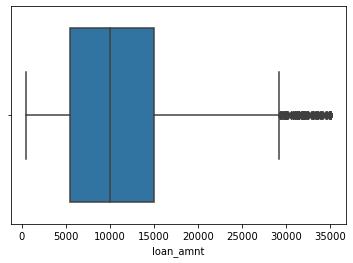

In [58]:
sns.boxplot(data=df,x='loan_amnt')
plt.show()

In [59]:
Q1=df['loan_amnt'].quantile(0.25)
Q2=df['loan_amnt'].quantile(0.5)
Q3=df['loan_amnt'].quantile(0.75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

In [60]:
df=df[(df['loan_amnt']>LB) & (df['loan_amnt']<UB)]

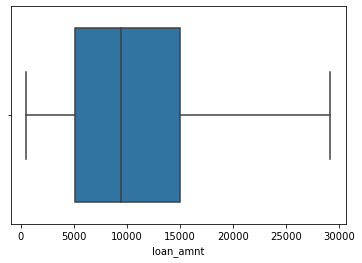

In [61]:
sns.boxplot(data=df,x='loan_amnt')
plt.show()

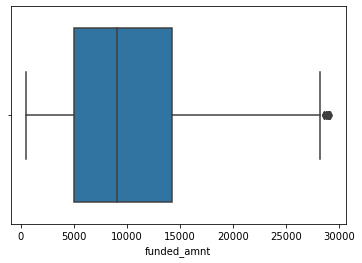

In [62]:
sns.boxplot(data=df,x='funded_amnt')
plt.show()

In [63]:
Q1=df['funded_amnt'].quantile(0.25)
Q2=df['funded_amnt'].quantile(0.5)
Q3=df['funded_amnt'].quantile(0.75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
df=df[(df['funded_amnt']>LB) & (df['funded_amnt']<UB)]

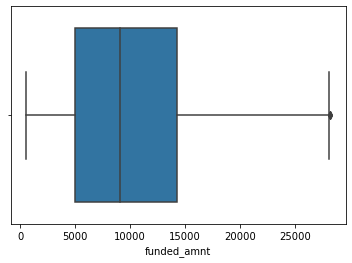

In [64]:
sns.boxplot(data=df,x='funded_amnt')
plt.show()

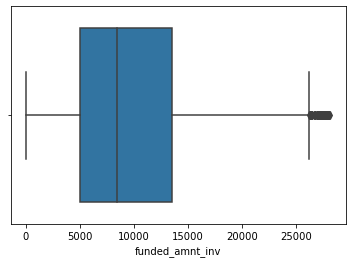

In [65]:
sns.boxplot(data=df,x='funded_amnt_inv')
plt.show()

In [66]:
Q1=df['funded_amnt_inv'].quantile(0.25)
Q2=df['funded_amnt_inv'].quantile(0.5)
Q3=df['funded_amnt_inv'].quantile(0.75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
df=df[(df['funded_amnt_inv']>LB) & (df['funded_amnt_inv']<UB)]

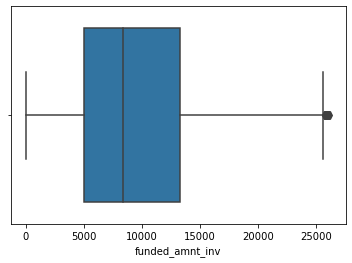

In [67]:
sns.boxplot(data=df,x='funded_amnt_inv')
plt.show()

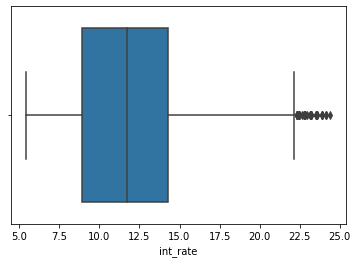

In [68]:
sns.boxplot(data=df,x='int_rate')
plt.show()

In [69]:
Q1=df['int_rate'].quantile(0.25)
Q2=df['int_rate'].quantile(0.5)
Q3=df['int_rate'].quantile(0.75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
df=df[(df['int_rate']>LB) & (df['int_rate']<UB)]

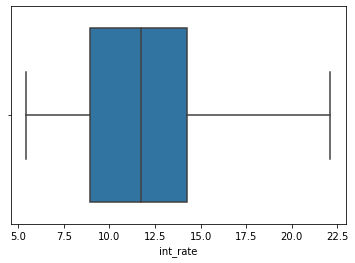

In [70]:
sns.boxplot(data=df,x='int_rate')
plt.show()

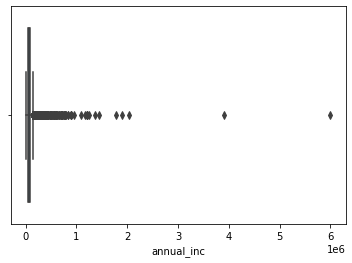

In [71]:
sns.boxplot(data=df,x='annual_inc')
plt.show()

In [72]:
Q1=df['annual_inc'].quantile(0.25)
Q2=df['annual_inc'].quantile(0.5)
Q3=df['annual_inc'].quantile(0.75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
df=df[(df['annual_inc']>LB) & (df['annual_inc']<UB)]

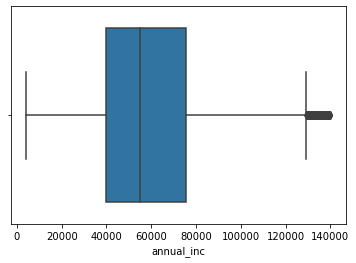

In [73]:
sns.boxplot(data=df,x='annual_inc')
plt.show()

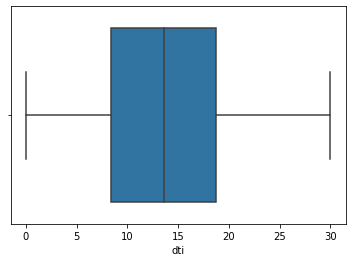

In [74]:
sns.boxplot(data=df,x='dti')
plt.show()

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34456 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    34456 non-null  int64         
 1   loan_amnt             34456 non-null  int64         
 2   funded_amnt           34456 non-null  int64         
 3   funded_amnt_inv       34456 non-null  float64       
 4   term                  34456 non-null  int32         
 5   int_rate              34456 non-null  float64       
 6   installment           34456 non-null  float64       
 7   grade                 34456 non-null  object        
 8   sub_grade             34456 non-null  object        
 9   emp_length            34456 non-null  float64       
 10  home_ownership        34456 non-null  object        
 11  annual_inc            34456 non-null  float64       
 12  verification_status   34456 non-null  object        
 13  issue_d         

# Univariate Analysis 

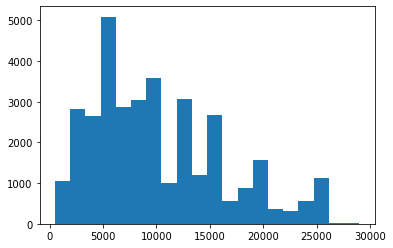

In [75]:
plt.hist(df['loan_amnt'],bins=20)
plt.show()

Inference- loan_amount is having the maximum value around 5000 and minimum near 30000

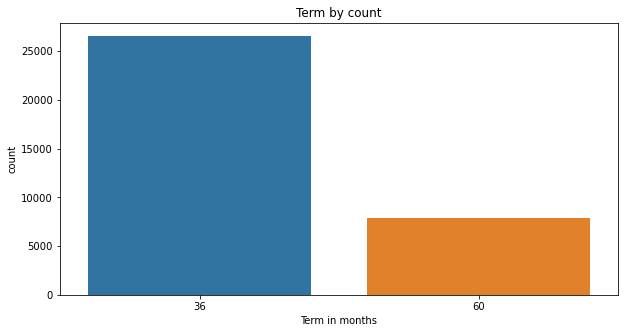

In [76]:
plt.figure(figsize=(10,5))
df1=sns.countplot(x=df.term)
df1.set_title("Term by count")
df1.set_xlabel("Term in months")

plt.show()


Inference- There are 2 terms but term with 36 months are having more borrowers

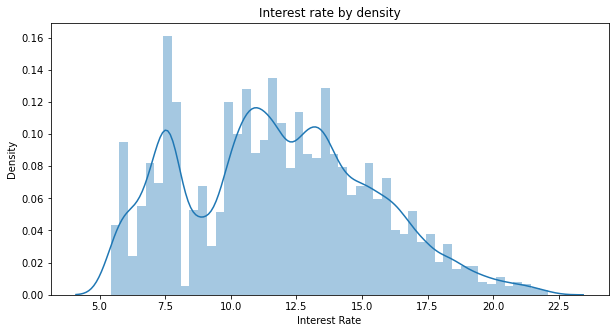

In [77]:
plt.figure(figsize=(10,5))
df2=sns.distplot(df.int_rate)
df2.set_title("Interest rate by density")
df2.set_xlabel("Interest Rate")

plt.show()

Inference- this graph shows that borrowers are having most rate of interest as 7.5 % and lowest near 20 % and above

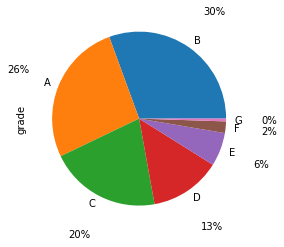

In [78]:
df.grade.value_counts().plot(kind='pie',autopct='%.i%%',pctdistance=1.5)
plt.show()

Inference- This graph shows that grade B is having maximum borrowers followed by grade A, which means less risk.

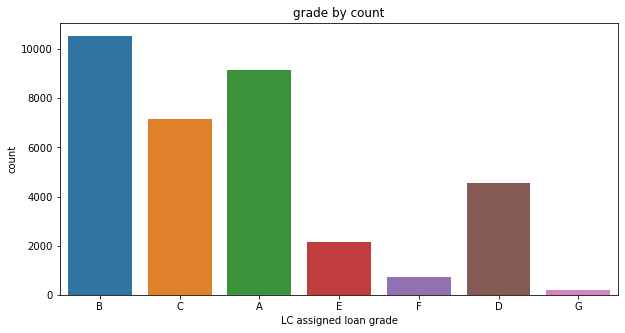

In [79]:
plt.figure(figsize=(10,5))
df1=sns.countplot(x=df.grade)
df1.set_title("grade by count")
df1.set_xlabel("LC assigned loan grade")

plt.show()

Inference- We can see that grade G is having lowest number of  borrowers.

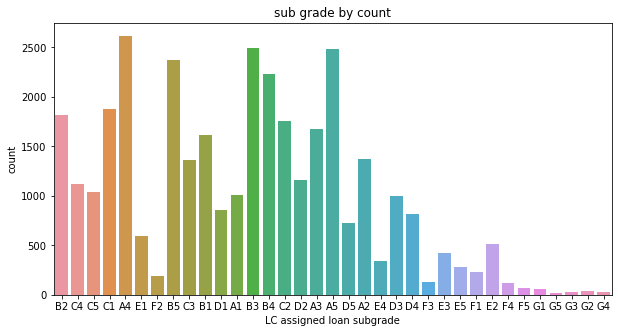

In [80]:
plt.figure(figsize=(10,5))
df1=sns.countplot(x=df.sub_grade)
df1.set_title("sub grade by count")
df1.set_xlabel("LC assigned loan subgrade")

plt.show()

Inference- It shows that subgrade A4,B3,A5 are having highest number of borrowers.

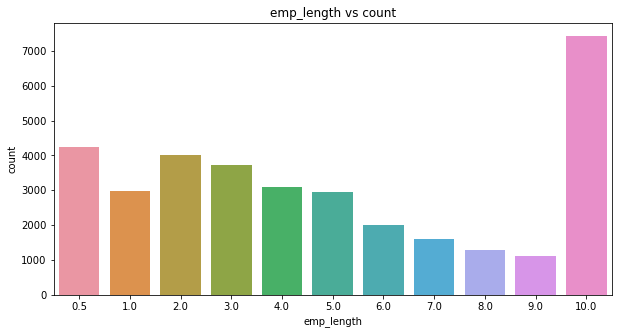

In [81]:
plt.figure(figsize=(10,5))
df1=sns.countplot(x=df.emp_length)
df1.set_title("emp_length vs count")
df1.set_xlabel("emp_length")

plt.show()

Inference- The employee length of year is maximum near 10 or above.

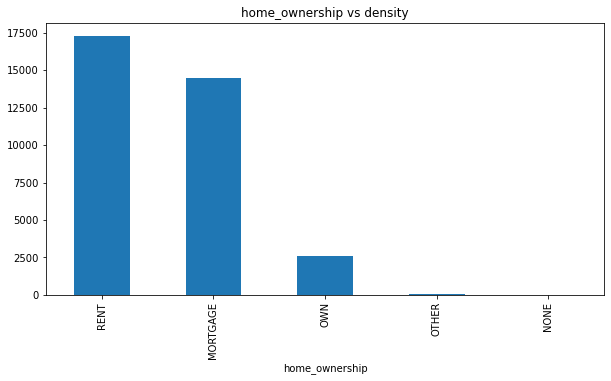

In [82]:
plt.figure(figsize=(10,5))
df1=df.home_ownership.value_counts().plot(kind='bar')
df1.set_title("home_ownership vs density")
df1.set_xlabel("home_ownership")
plt.show()

Inference- The maximum numbers of borrowers are getting loan with rent and mortgage home ownership and there are no or very little borrowers which doesnt consider home ownership as the basis of taking loan.

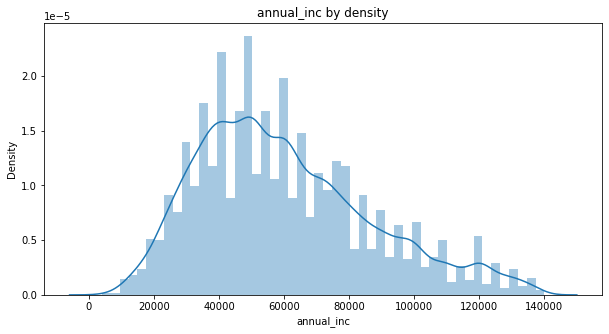

In [83]:
plt.figure(figsize=(10,5))
df2=sns.distplot(df.annual_inc)
df2.set_title("annual_inc by density")
df2.set_xlabel("annual_inc")

plt.show()

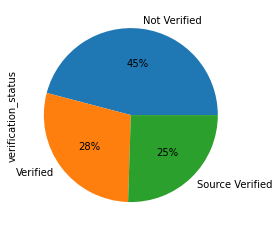

In [84]:
df.verification_status.value_counts().plot(kind='pie',autopct='%.i%%')
plt.show()

Inference- Borrowers with erification status with 'not verified'  are high compared to verified and source verfied.

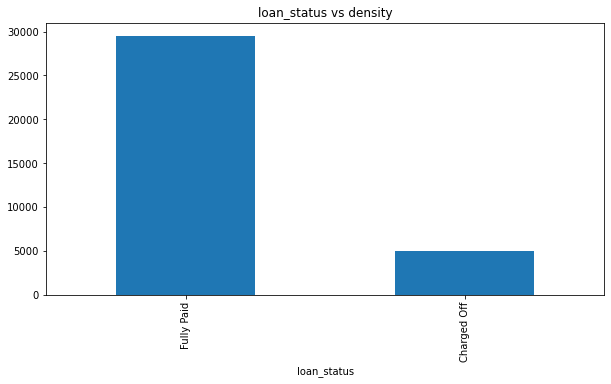

In [85]:
plt.figure(figsize=(10,5))
df1=df.loan_status.value_counts().plot(kind='bar')
df1.set_title("loan_status vs density")
df1.set_xlabel("loan_status")
plt.show()

Inference- Charged off percentage are very low compared to fully paid

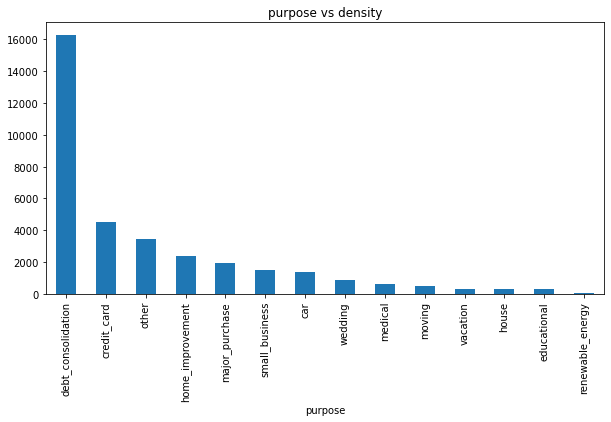

In [86]:
plt.figure(figsize=(10,5))
df1=df.purpose.value_counts().plot(kind='bar')
df1.set_title("purpose vs density")
df1.set_xlabel("purpose")
plt.show()

Inference- Around 16000 borrowers are having purpose for taking loan as debt_consolidation.

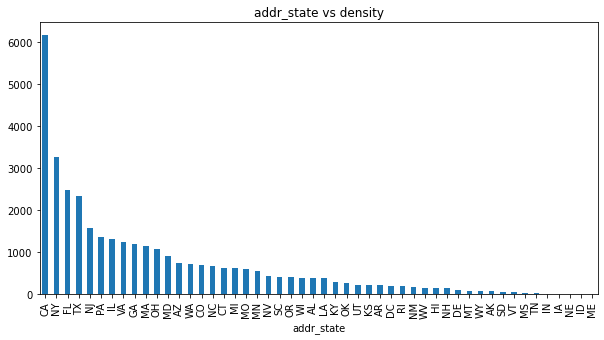

In [87]:
plt.figure(figsize=(10,5))
df1=df.addr_state.value_counts().plot(kind='bar')
df1.set_title("addr_state vs density")
df1.set_xlabel("addr_state")
plt.show()



Inference- CA,NY,FL,TX are the cities with most loan applications.

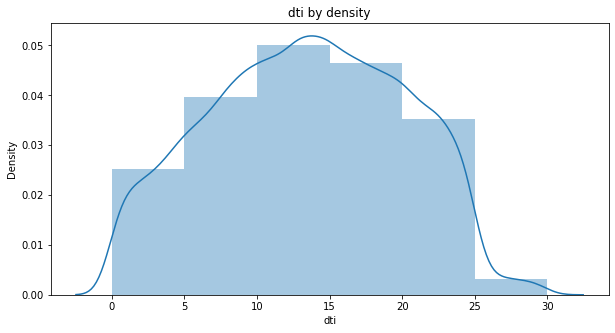

In [88]:
plt.figure(figsize=(10,5))
df2=sns.distplot(df.dti,kde=True,bins=6)
df2.set_title("dti by density")
df2.set_xlabel("dti")
plt.show()

Inference- DTI ratio is maximum in range 10-15 and minimum in range 25-30. This predict that most people are not likely to manage additional debts.

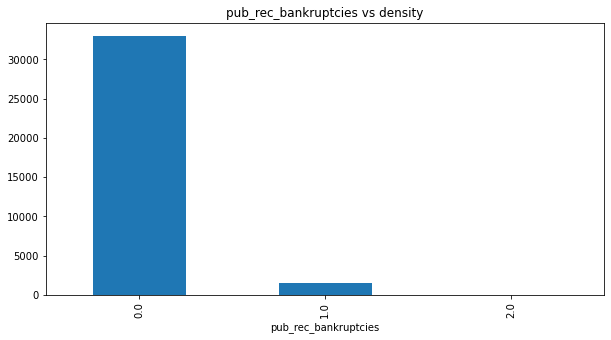

In [89]:
plt.figure(figsize=(10,5))
df1=df.pub_rec_bankruptcies.value_counts().plot(kind='bar')
df1.set_title("pub_rec_bankruptcies vs density")
df1.set_xlabel("pub_rec_bankruptcies")
plt.show()

Inference- There are most of borrowers with 0 number of public bankrupties.

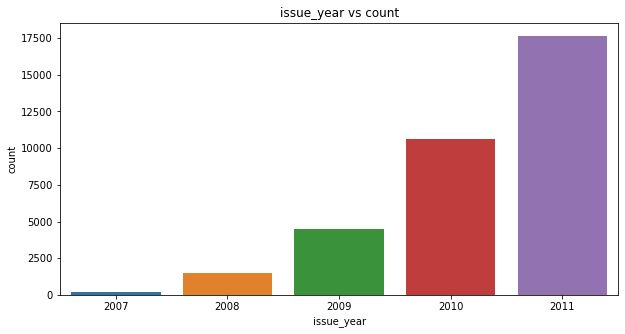

In [90]:
plt.figure(figsize=(10,5))
df1=sns.countplot(x=df.issue_year)
df1.set_title("issue_year vs count")
df1.set_xlabel("issue_year")

plt.show()

Inference- 2011 is the year in which very high loan applications were issued comparatively.

# Segmented univeriate analysis

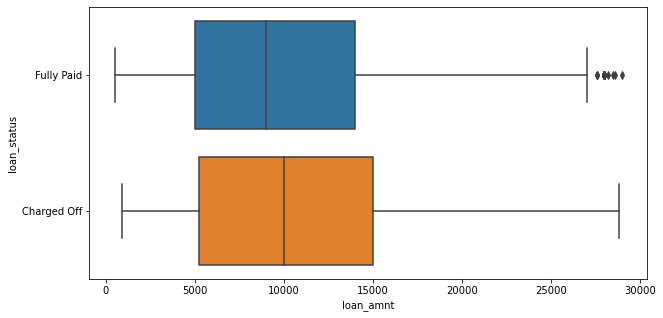

In [91]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x=df.loan_amnt,y=df.loan_status)
df2.set_title("distiribution of loan status and loan_amnt")
df2.set_xlabel("loan_amnt")
plt.show()

Inference-The borrowers with charged off loan status are more likely to ask for more loan amount compared to the fully paid. This means that higher amount of loan have high chances of defaulting.

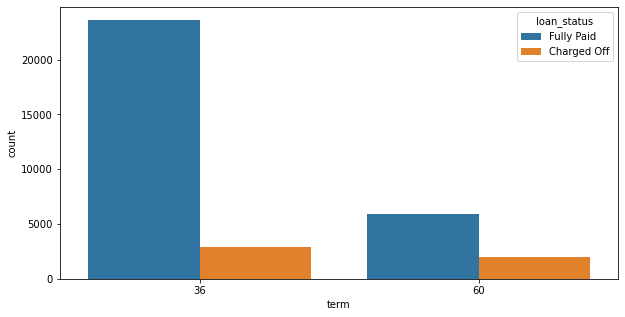

In [92]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x=df.term,hue=df.loan_status)
df2.set_title("distiribution of loan status and term")
df2.set_xlabel("term in months")
plt.show()

Inference- Compared to the term month as 60, there are more defaulters in the term as 36 months.

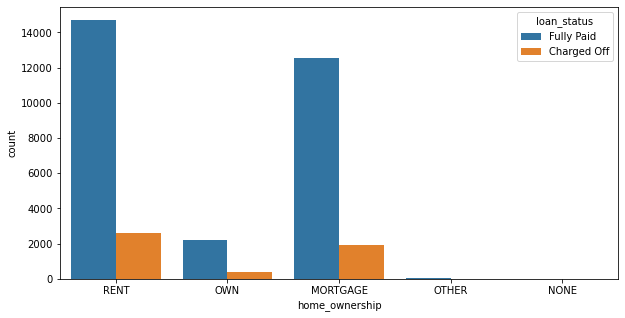

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x=df.home_ownership,hue=df.loan_status)
df2.set_title("distiribution of loan status and home_ownership")
df2.set_xlabel("home_ownership")
plt.show()

Inference-Borrowers with home_ownership as rent and mortgage are more likely to not repay the loan compared to the others. Also there are good amount of fullypaid borrowers who have their own home.

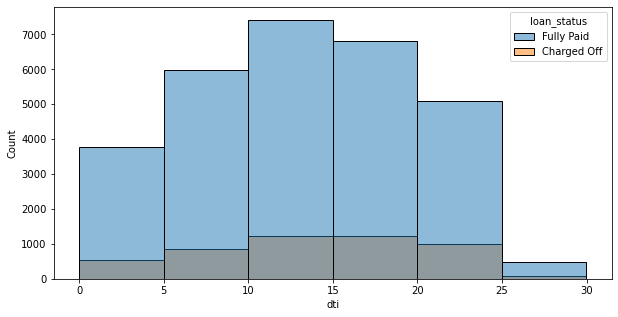

In [94]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df.dti,hue=df.loan_status,bins=6)
df2.set_title("distiribution of loan status and dti")
df2.set_xlabel("dti")
plt.show()

Inference- Borrowers with DTI ratio between 10 to 20 are more likely to be a defaulter who may not repay loan. In the other side the less dti ratio can be preferred.

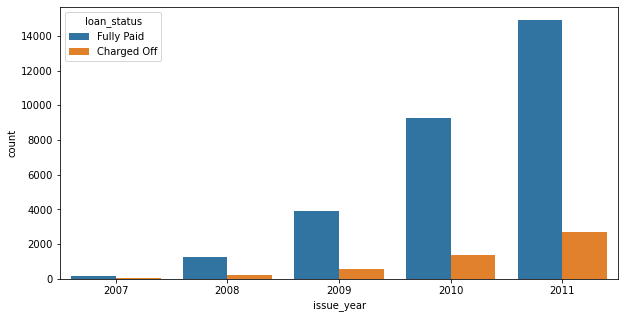

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(df.issue_year,hue=df.loan_status)
df2.set_title("distiribution of loan status and issue_year")
df2.set_xlabel("issue_year")
plt.show()

Inference- No of defaulters are increasing from 2007 to 2011 and maximum in 2011.

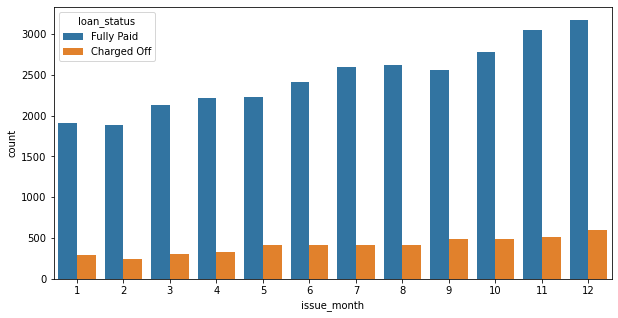

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(df.issue_month,hue=df.loan_status)
df2.set_title("distiribution of loan status and issue_year")
df2.set_xlabel("issue_year")
plt.show()

Inference- Majority of loan which are given in last quarter are having more number of borrowers as defaulters

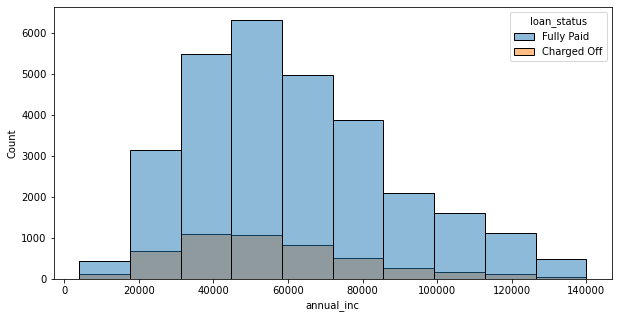

In [97]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df.annual_inc ,hue=df.loan_status,bins=10)
df2.set_title("distiribution of loan status and annual_inc ")
df2.set_xlabel("annual_inc ")
plt.show()

Inference- It can be noticed that the borrowers with the innual increment between 20000 to 80000 are more likely to not repay loan.And as the curve is left skewed the majority of borrowers have low income compared to others.

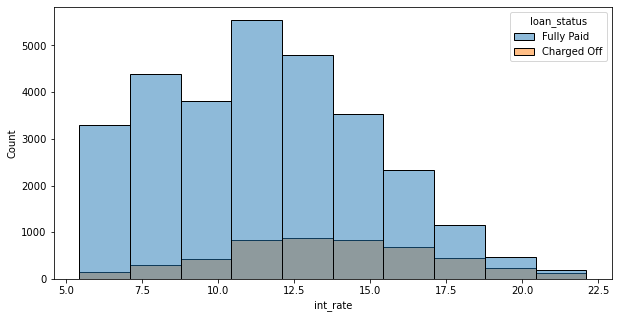

In [98]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df.int_rate ,hue=df.loan_status,bins=10)
df2.set_title("distiribution of loan status and annual_inc ")
df2.set_xlabel("annual_inc ")
plt.show()

Inference- If the interest rate is higher the charged off rate is also higher.

# Bivariate Analysis

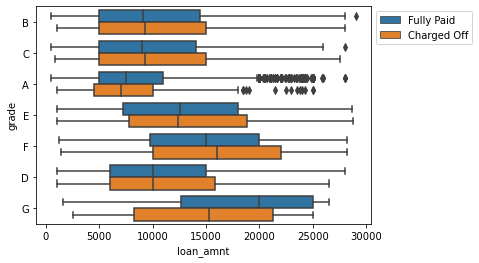

In [99]:
sns.boxplot(x=df['loan_amnt'],y=df['grade'],hue=df['loan_status'])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Inference- It can be seen that with higher grade & higher loan amount and with lower grade & lower loan amount, the borrower are less likedly to charged off.

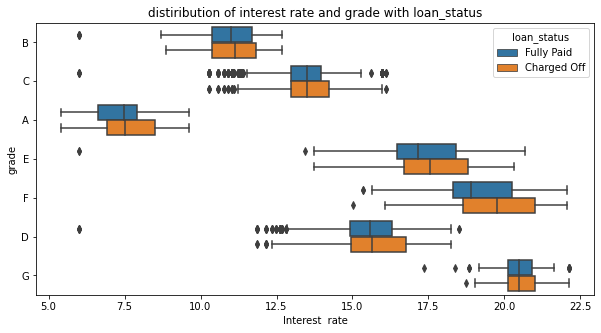

In [100]:

plt.figure(figsize=(10,5))
sns.boxplot(x=df['int_rate'],y=df['grade'],hue=df['loan_status'])
plt.title("distiribution of interest rate and grade with loan_status")
plt.xlabel("Interest  rate")
plt.show()

Inference- Here we can see that as the grade is increasing from A to G the interest rate also increases and with the chances of charged off also increases.

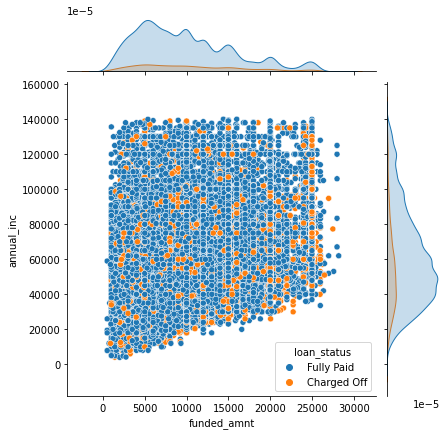

In [101]:
sns.jointplot(data=df,x='funded_amnt',y='annual_inc',hue='loan_status')
plt.show()

Inference - As the annual_increment of borrower increases the funded amount also increases and we can see that the defaulters are also increasing at the end where funded amount is more. 

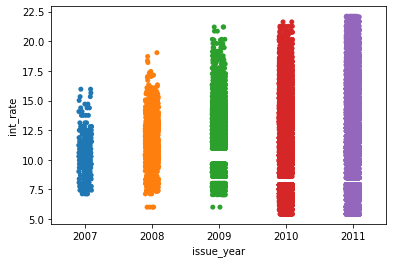

In [102]:
sns.stripplot(data=df,x='issue_year',y='int_rate')
plt.show()

Inference - From this graph , we can conclude that as the years increasing,  interest rates also increasing 

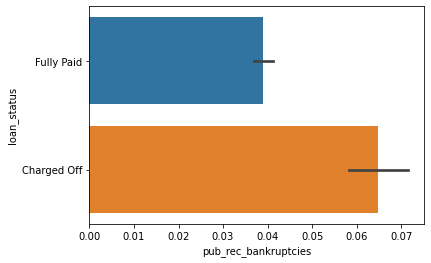

In [103]:
sns.barplot(data=df,x='pub_rec_bankruptcies',y='loan_status')
plt.show()

Inference- This graph depicts that defaulters are more often to have more public record of bankruptcies.

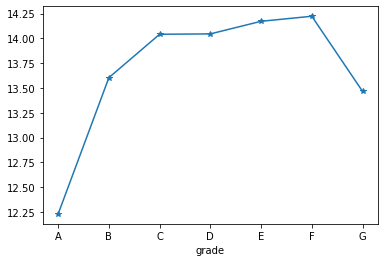

In [104]:
df.groupby('grade')['dti'].mean().plot(marker='*')
plt.show()

Inference - The above graph shows the average DTI with repect to grade and we can say that the avg DTI is increasing with each grade till F but decreasing from F to G. As the grade increases from A to higher the  risk also increases, maybe average user dont want high rate of interest with higher risk after a perticular grade.

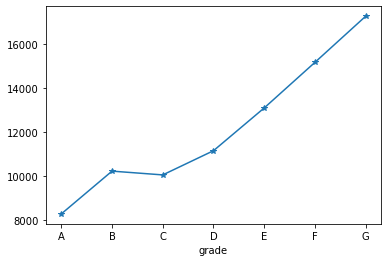

In [105]:
df.groupby('grade')['loan_amnt'].mean().plot(marker='*')
plt.show()

Inference - inspite of higher risks the avg loan_amnt is increasing, borrowers are ready to take higher amount with higher rate of interest.

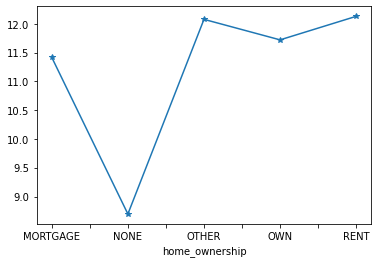

In [106]:
df.groupby('home_ownership')['int_rate'].mean().plot(marker='*')
plt.show()

Inference - We can see that the average interest rates for the mortgage is less as compared to the other types of home ownerships

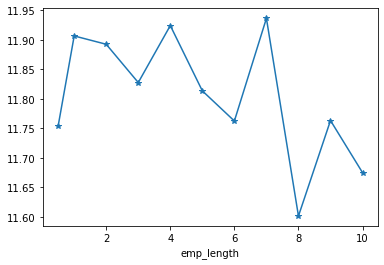

In [107]:
df.groupby('emp_length')['int_rate'].mean().plot(marker='*')
plt.show()

Inference - As the employee's length of  years increases , the rate of interest comparatively decreases.

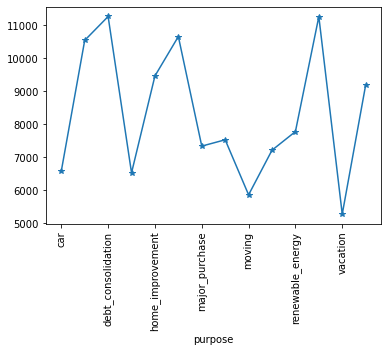

In [108]:
df.groupby('purpose')['funded_amnt'].mean().plot(marker='*')
plt.xticks(rotation=90)
plt.show()

 Inference - On an average for debt_consolidation and for renewable energy most of the loan are taken.

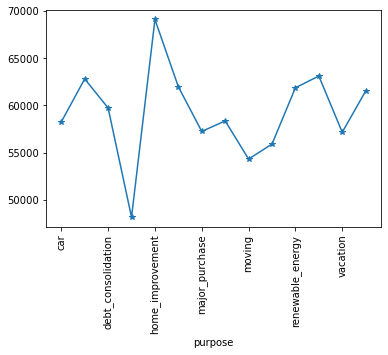

In [109]:
df.groupby('purpose')['annual_inc'].mean().plot(marker='*')
plt.xticks(rotation=90)
plt.show()

Inference - On an average, people are most likely to take a loan for home improvement after their annual increment.

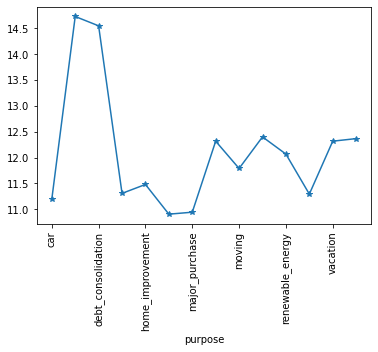

In [110]:
df.groupby('purpose')['dti'].mean().plot(marker='*')
plt.xticks(rotation=90)
plt.show()

Inference - DTI is very high for debt_consolidation as compared to the others

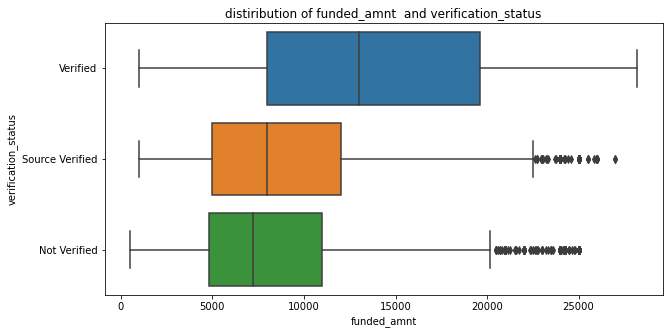

In [111]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['funded_amnt'],y=df['verification_status'])
plt.title("distiribution of funded_amnt  and verification_status")
plt.xlabel("funded_amnt")
plt.show()

Inference - For borrowers with verified status are more likely  to get the greater funded amount.

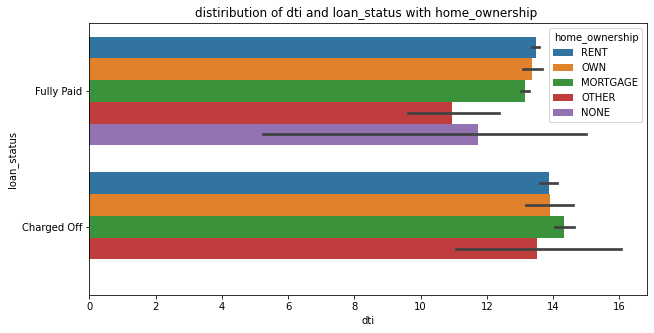

In [112]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['dti'],y=df['loan_status'],hue=df['home_ownership'])
plt.title("distiribution of dti and loan_status with home_ownership ")
plt.show()

Inference - Defaulters are more likely be from the mortgage home_ownership and have high DTI ratio.

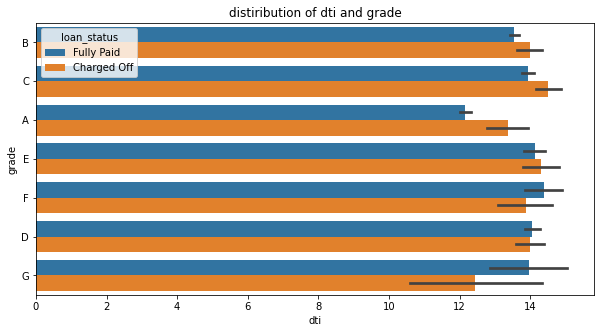

In [113]:

plt.figure(figsize=(10,5))
sns.barplot(x=df['dti'],y=df['grade'],hue=df.loan_status)
plt.title("distiribution of dti and grade")
plt.show()

Inference -C grade is having maximum chances of charged off borrowers with highest DTI ratio and lowest of charged off borrowers in G grade.

<Figure size 720x360 with 0 Axes>

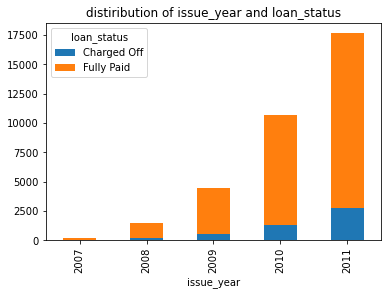

In [114]:
plt.figure(figsize=(10,5))
pd.crosstab(df['issue_year'],df['loan_status']).plot(kind='bar',stacked=True)
plt.title("distiribution of issue_year and loan_status")
plt.show()

Inference - In 2011, good number of the borrowers were defaulters and the numbers of defaulters are increasing year by year.

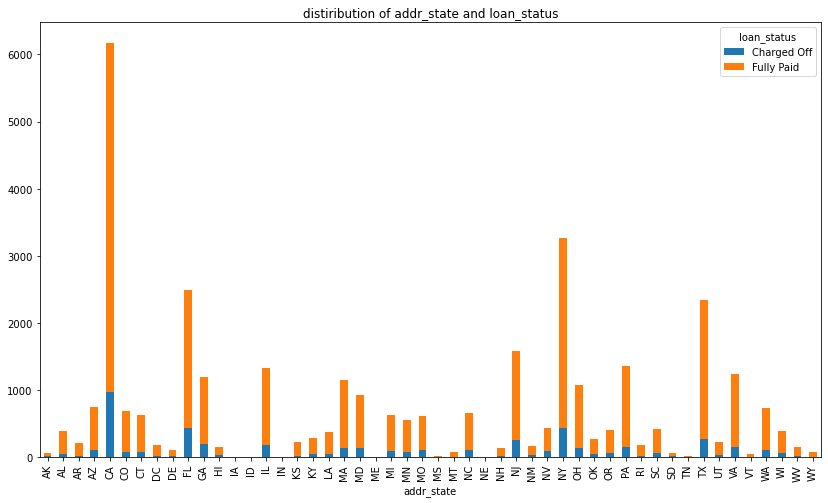

In [115]:
fig,ax=plt.subplots(figsize=(14,8))
pd.crosstab(df['addr_state'],df['loan_status']).plot(kind='bar',stacked=True,ax=ax)
plt.title("distiribution of addr_state and loan_status")
plt.show()

Inference - We can see that california(CA) state shows more number of charged off borrowers and also fully paid borrowers.

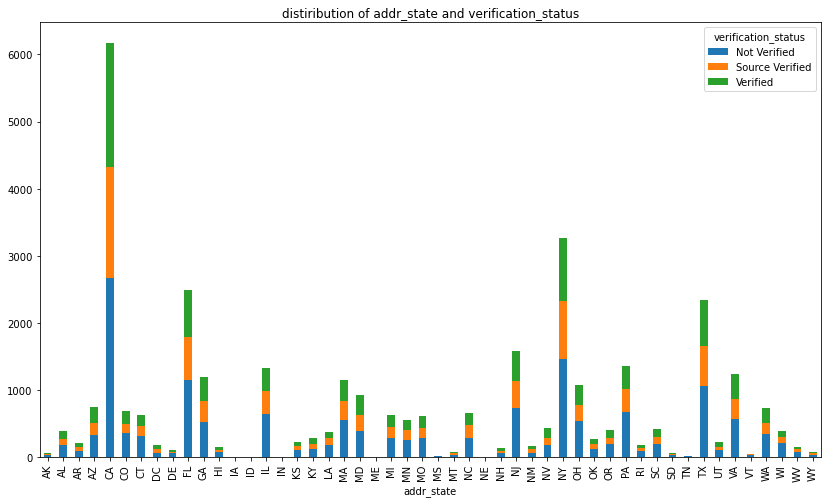

In [124]:
fig,ax=plt.subplots(figsize=(14,8))
pd.crosstab(df['addr_state'],df['verification_status']).plot(kind='bar',stacked=True,ax=ax)
plt.title("distiribution of addr_state and verification_status")
plt.show()

Inference - In California(CA),Florida(FL)Newyork(NY),Texas(TX) , most of the borrowers are not verified.

In [117]:
df.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int32
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                     float64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
issue_year                       int64
issue_month                      int64
dtype: object

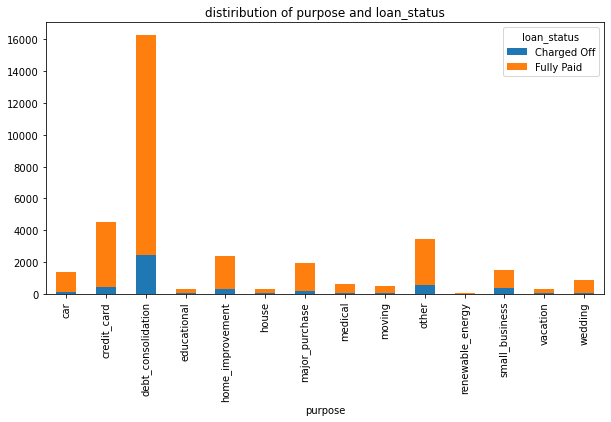

In [123]:
fig,ax=plt.subplots(figsize=(10,5))
pd.crosstab(df['purpose'],df['loan_status']).plot(kind='bar',stacked=True,ax=ax)
plt.title("distiribution of purpose and loan_status")
plt.show()

Inference - From graph we can infer that defaulters are taking loans for the smaller bussiness and debt_consolidation purpose.

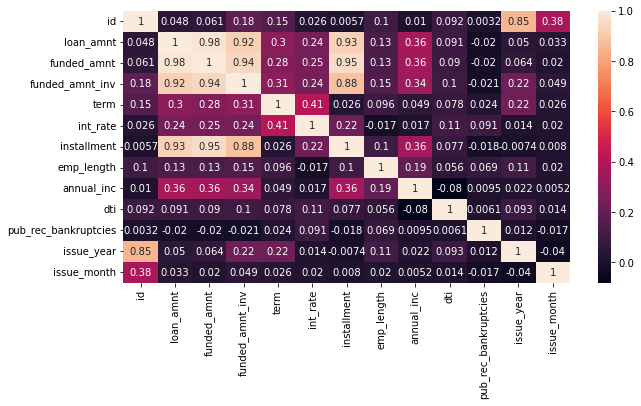

In [119]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

Inference- 
From the correlation matrix , we can see that loan amount and funded amount have most positive relationships that means most of the loan are approved and got the same loan amount they asked for.
We can infer that public bankruptcies and loan amnt and funded amount have negative relationship.


# Insights

The major driving factors behind loan default prediction and to reduce credit loss are-
1) DTI
2) Verification_status
3) Interest rates
4) pub_rec_bankrupties
5) Grades

Outcomes from the analysis to predict whether the borrower is defaulter or not-
1) Higher the amount of loan have high chances of defaulting.

2) As grade is increasing from A to G the interest rate also increases and with that the chances of charged off also increases.

3) defaulters are more often to have more public record of bankruptcies.

4) Defaulters are more likely be from the mortgage home_ownership and have high DTI ratio.

5) C grade is having maximum chances of charged off borrowers with highest DTI ratio and lowest of charged off borrowers in G      grade.

6) California(CA),Florida(FL),Newyork(NY) and Texas(TX) states show more number of charged off borrowers and most of the            borrowers are not verified.

7) Defaulters are taking loans for the smaller bussiness and debt_consolidation purpose.

8) Majority of borrowers have high DTI ratio concentrated between 10-20.

9) Borrowers with the innual increment between 20000 to 80000 are more likely to not repay loan.And as the curve is left skewed    the majority of borrowers have low income compared to others.

10) Borrowers with defaulter tag are more likely to have public bank record for bankrupties.

11) Borrowers with 36 months as term are more likely to be defaulters than the 60 months term.

12) Interest rate is higher then the charged off rate is also higher.